<a href="https://colab.research.google.com/github/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_07_Wayne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #07
### Explainable Deep Learning

Instructions
Develop a hypothesis and design a study using explainable deep learning methods to test your hypothesis. You can use any deep learning method discussed during the lecture: concept activation vectors, feature visualization, saliency maps, integrated gradients, or occlusion methods.



Hypothesis must be in the form of a null/alternative hypothesis.



Share your result as a visual report. This report can be in the form of a Google Colab, webpage, blog, or PDF and should contain the H0/H1 hypothesis, a brief explanation of the approach, the visualizations and/or explanations, and a summary of your findings. If Google Colab is not your medium of choice, please include source code as a link in your report.



Note: You will NOT be graded on whether or not your null hypothesis was rejected, only on whether your experiments appropriately tested your hypothesis.



Example hypothesis:

H0: The GoogleNet model does not show a significant difference in its ability to learn the concept "striped" compared to the concept "dotted" for the class ‘zebra’.



H1: The GoogleNet model shows a significant difference in its ability to learn the concept "striped" compared to the concept "dotted" for the class ‘zebra’, specifically, it learns the concept "striped" but not the concept "dotted".



### Wayne Yang
#### https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_07_Wayne.ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1U8s0-7tK4sQA5-Mnvlo4v37CrWS7ZYfn#scrollTo=q87mSlrkFKst)


In [1]:
!rm -r ./sample_data

In [2]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data


# Clone GitHub files to colab workspace
repo_name = "Duke_xAI_Wayne" # Change to your repo name
git_path = 'https://github.com/Trip1ewhy/Duke_xAI_Wayne.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment #02_Wayne'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke_xAI_Wayne'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 168 (delta 15), reused 4 (delta 4), pack-reused 135 (from 1)
Receiving objects: 100% (168/168), 83.79 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (22/22), done.
[Errno 2] No such file or directory: 'Duke_xAI_Wayne/Assignment #02_Wayne'
/content
Duke_xAI_Wayne/


In [3]:
pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.3 MB/s eta 0:00:00


In [4]:
!pip install tcav matplotlib==2.2.4 Pillow==8.2.0 scikit-learn==0.20.3 scipy==1.2.1 tensorflow==2.14.1 numpy==1.19.2 protobuf==3.10.0 pandas==1.0.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 59.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error wh

In [8]:
!pip install tcav

  Using cached tcav-0.2.2-py3-none-any.whl.metadata (4.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.1 MB/s eta 0:00:00


In [26]:
import pandas as pd
from PIL import Image
import io
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from captum.attr import IntegratedGradients, Saliency
import os
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tcav.model import KerasModelWrapper
import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
from tcav.tcav import TCAV
import tcav.utils as utils
import tcav.utils_plot as utils_plot
import torch.nn as nn
import pyarrow.parquet as pq
from torchvision import models, transforms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


##School Bus

In [10]:
df = pd.read_parquet("/content/Duke_xAI_Wayne/Assignment #07/schoolBus.parquet")

# check data
print(df.head())

                                                   image  label
12355  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
12356  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
12357  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
12358  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
12359  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779


In [24]:
# Extract the data about schoolBus
df = df[df['label'] == 779]
df = df.reset_index(drop=True)
# check first several rows
print(df.head())
print(len(df))
#df_label_0.to_parquet("/content/Duke_xAI_Wayne/Assignment #02/filename.parquet")

                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    779
1200


## Hypothesis
H0: The ResNet-34 model does not show a significant difference in its ability to learn the concept "wheel" compared to the concept "window" for the class 'school bus'.

H1: The ResNet-34 model shows a significant difference in its ability to learn the concept "wheel" compared to the concept "window" for the class 'school bus', specifically, it learns the concept "wheel" but not the concept "window".


##Integrated Gradients and Saliency Map

Integrated Gradients:

Integrated Gradients attribute the importance of each pixel by computing the gradient of the model's prediction as the input transitions from a baseline (e.g., a black image) to the original image. It sums the gradients over this path, showing how much each pixel contributes to the prediction.

Saliency Map:

Saliency Maps highlight the most important pixels for a model’s decision by computing the gradient of the output class score with respect to the input image. Pixels with the largest gradients are deemed most important, showing which parts of the image influenced the prediction the most.

In [12]:
# Load pre-trained model (ResNet)
model = models.resnet34(pretrained=True)
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 75.3MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
# Define transformation for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Access the image bytes from the 'bytes' key
img_dict = df['image'].iloc[0]  # Assuming 'image' column contains the dictionary
img_bytes = img_dict['bytes']  # Extract image bytes

# Decode the byte array to an image using PIL
img = Image.open(io.BytesIO(img_bytes))

# Apply transformations
img_tensor = transform(img)

# Check the shape of the processed image
print(img_tensor.shape)

torch.Size([3, 224, 224])


In [14]:
# Process all images in the dataset
images = []
for idx, row in df.iterrows():
    img_dict = row['image']
    img_bytes = img_dict['bytes']
    img = Image.open(io.BytesIO(img_bytes))  # Decode the image
    img_tensor = transform(img)  # Apply transformations
    images.append(img_tensor)  # Store the transformed image

# Example: check the first image's shape
print(images[0].shape)

torch.Size([3, 224, 224])


In [15]:
#function to visualize attributions
def visualize_attributions(original_img, attributions, method_name):
    attributions = attributions.squeeze().cpu().detach().numpy()
    attributions = np.transpose(attributions, (1, 2, 0))  # Convert to HWC format
    attributions = np.sum(attributions, axis=-1)  # Sum across channels

    # Normalize attributions for visualization
    attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())

    # Display original and attributed image side by side
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[1].imshow(attributions, cmap='hot')
    ax[1].set_title(f'{method_name} Map')
    plt.show()

0
Processing image 1/1200


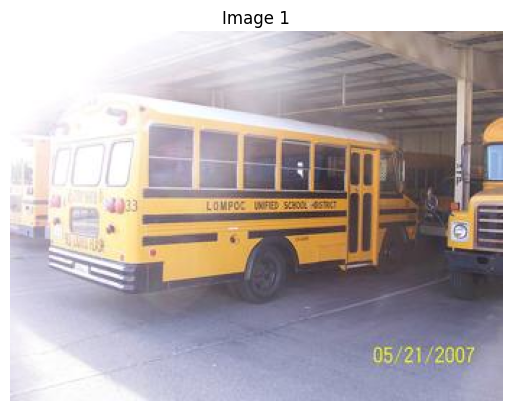

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


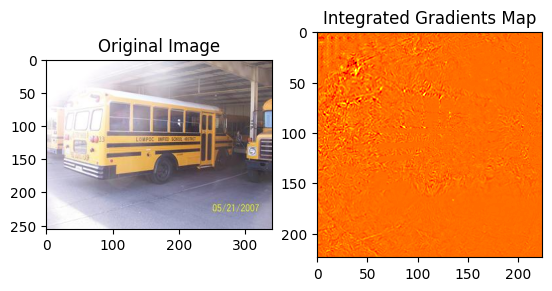

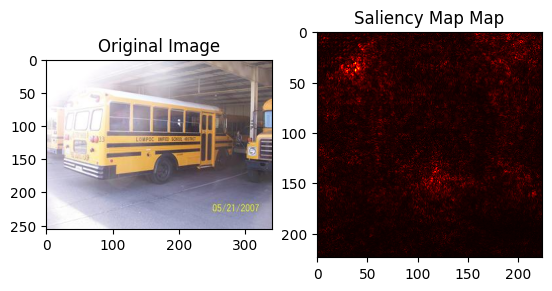

1
Processing image 2/1200


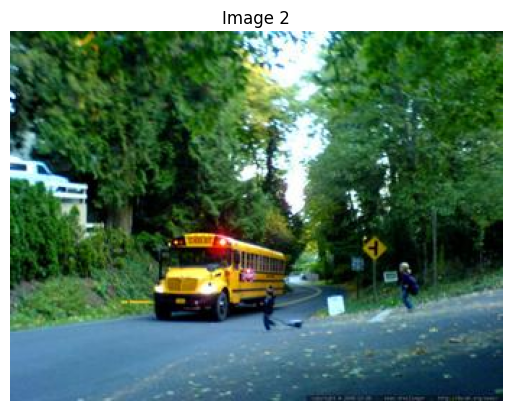

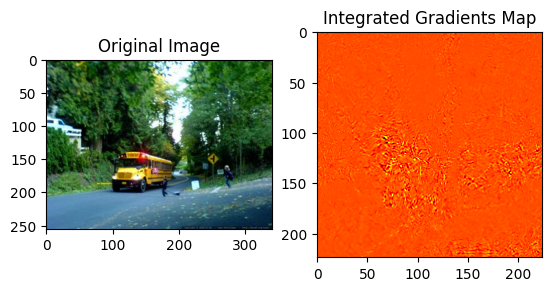

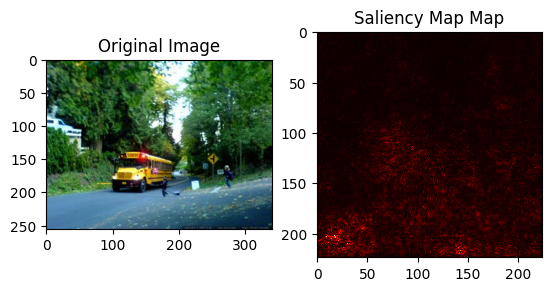

2
Processing image 3/1200


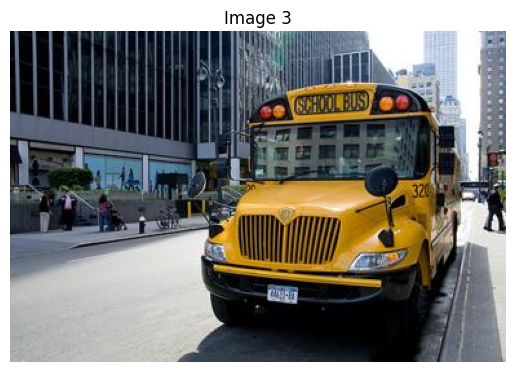

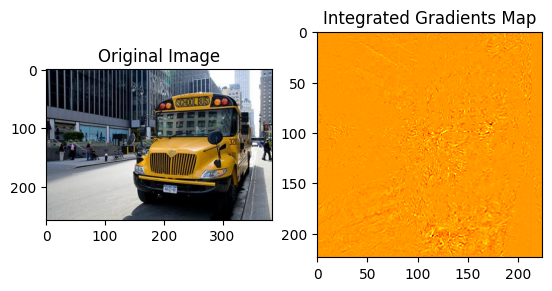

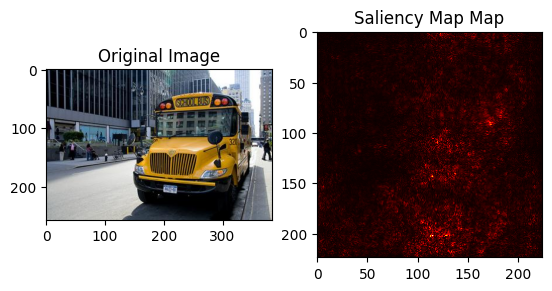

3
Processing image 4/1200


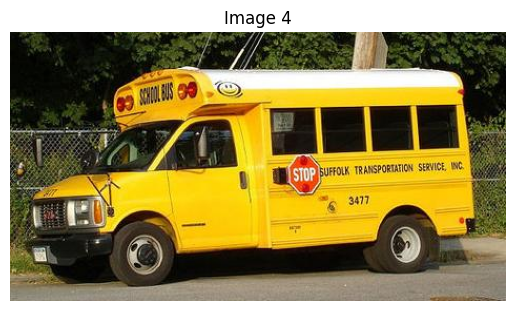

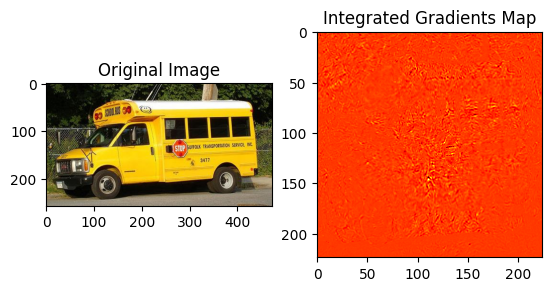

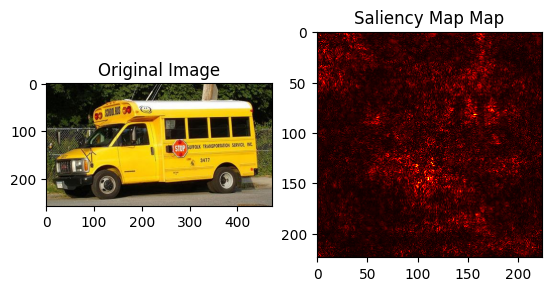

4
Processing image 5/1200


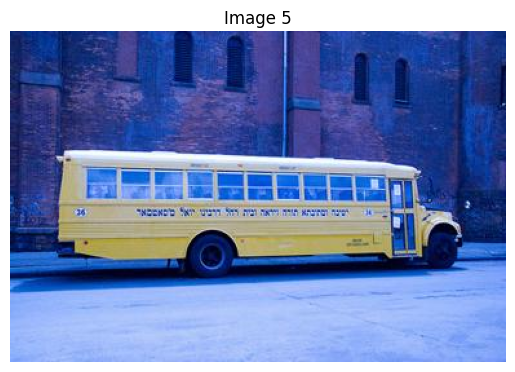

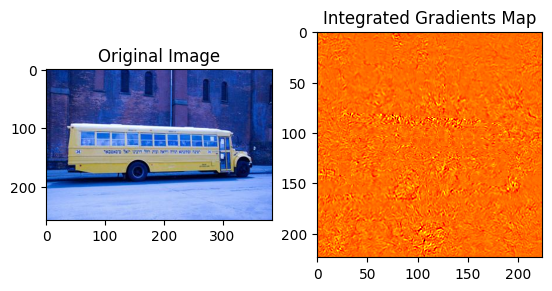

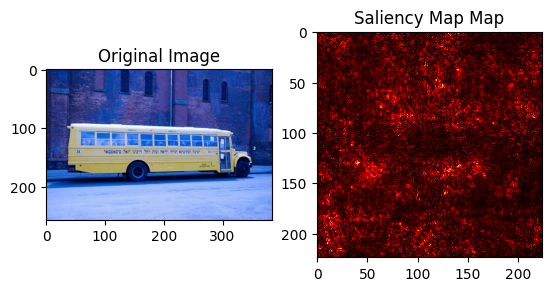

5
Processing image 6/1200


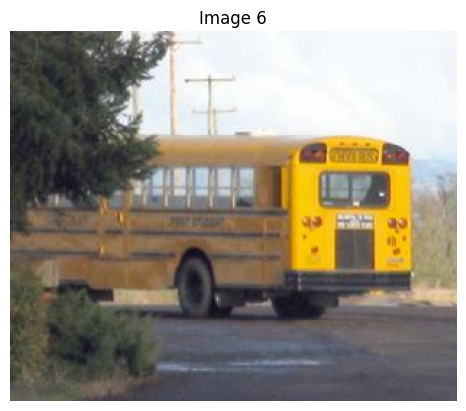

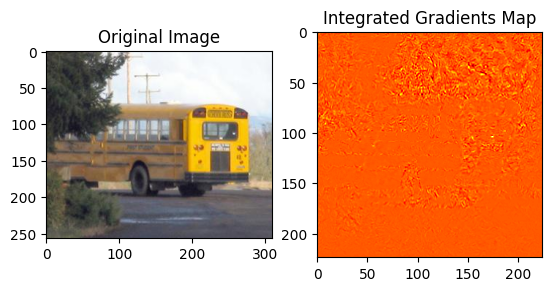

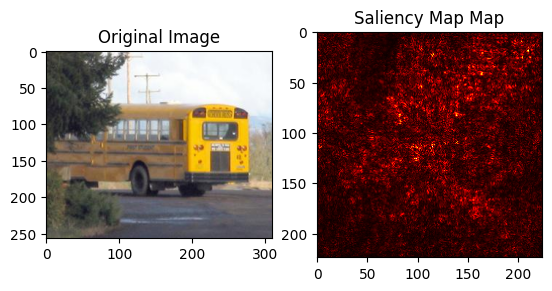

6
Processing image 7/1200


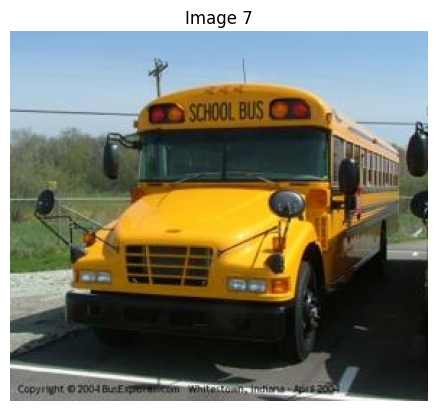

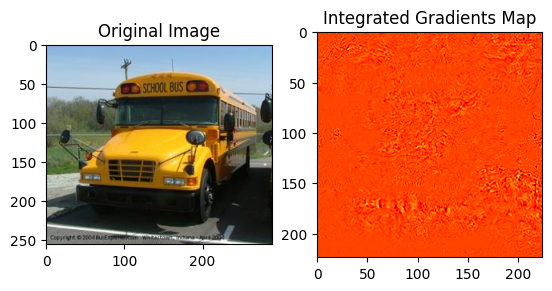

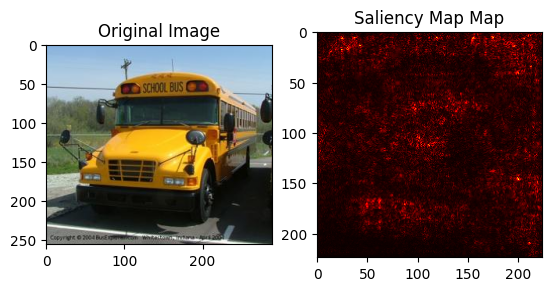

7
Processing image 8/1200


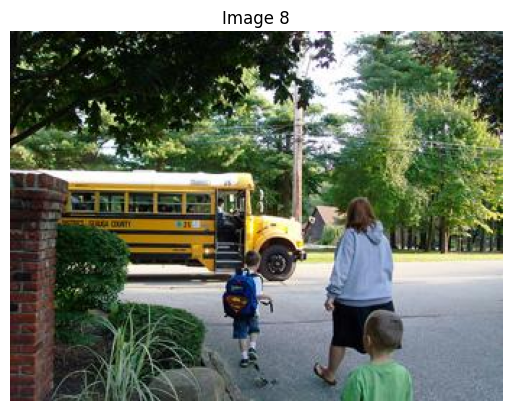

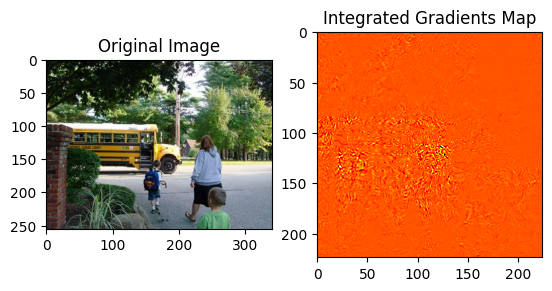

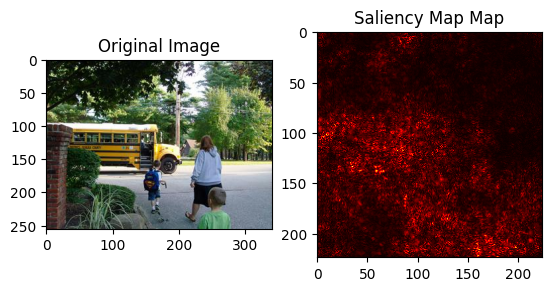

8
Processing image 9/1200


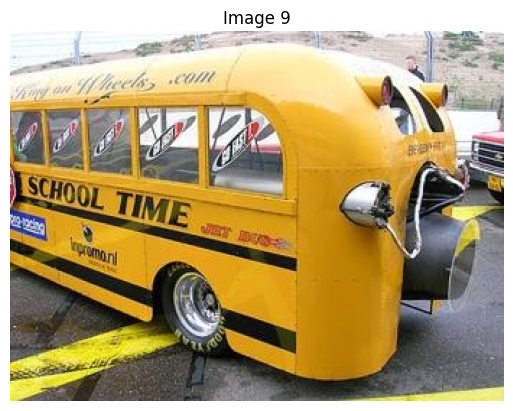

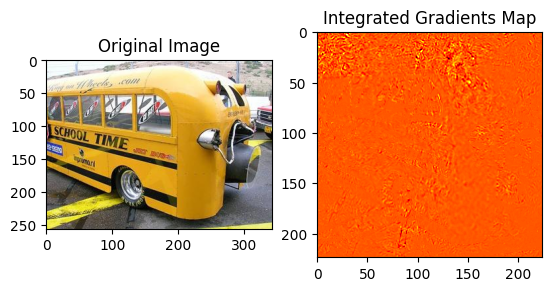

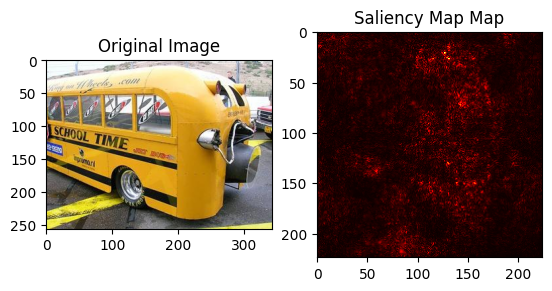

9
Processing image 10/1200


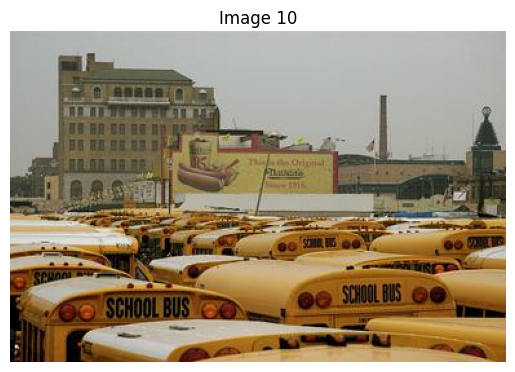

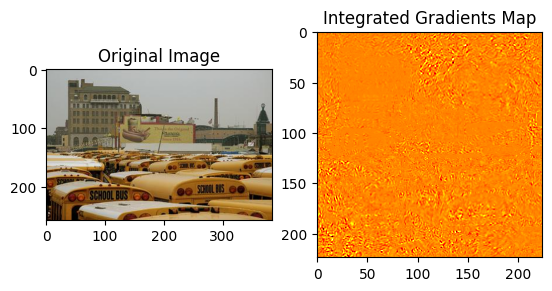

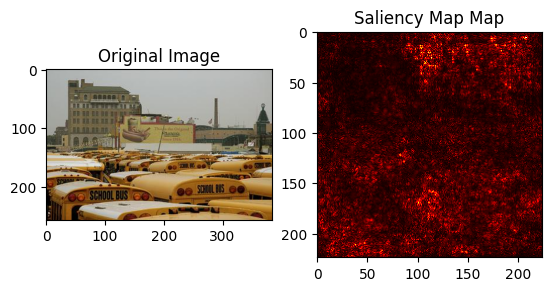

10


In [16]:
# Iterate through all images in the dataset
# Define the maximum number of images to process (first 10 by default, 1200 images in total)
max_images = 10

for idx, row in df.iterrows():
    print(idx)
    if idx >= max_images:
        #print(2)
        break
    img_dict = row['image']
    img_bytes = img_dict['bytes']
    img = Image.open(io.BytesIO(img_bytes))  # Decode the image
    img_tensor = transform(img).unsqueeze(0)  # Apply transformations and add batch dimension

    # Print loop progress (display index or other details)
    print(f"Processing image {idx+1}/{len(df)}")

    # Show the original image using matplotlib
    plt.imshow(img)
    plt.title(f"Image {idx+1}")
    plt.axis('off')  # Hide axes for better display
    plt.show()  # Display the image

    # Forward pass through the model to get prediction
    output = model(img_tensor)
    prediction_class = output.argmax().item()

    # Integrated Gradients method
    ig = IntegratedGradients(model)
    attributions_ig = ig.attribute(img_tensor, target=prediction_class, n_steps=30)

    # Saliency method
    saliency = Saliency(model)
    attributions_saliency = saliency.attribute(img_tensor, target=prediction_class)

    # Load the original image for display (without transformation)
    original_image = Image.open(io.BytesIO(img_bytes))

    # Visualize Integrated Gradients attributions
    visualize_attributions(original_image, attributions_ig, 'Integrated Gradients')

    # Visualize Saliency map attributions
    visualize_attributions(original_image, attributions_saliency, 'Saliency Map')

## Summary

Both the Integrated Gradients Map and Saliency Map indicate which parts of the school bus image influenced the model's decision. While the Integrated Gradients Map shows a more distributed contribution across the image, the Saliency Map highlights more specific regions, potentially focusing on the finer details.

From these two types of images, it can be seen that the outline of the bus is used as a condition to detect whether it is a bus. However, it is difficult to compare the importance difference between the window and the wheel from the Integrated Gradients and Saliency Map, so the TCAV method will be used next.

## TCAV

Approach steps:

Concept Activation Vector (CAV): TCAV introduces the idea of CAV, which represents a specific concept in the model’s internal activations. For example, a concept like "wheel" or "striped" is mapped to a vector that captures this idea within the model's neural activations.

Measuring Concept Importance: TCAV tests how much a model's prediction for a particular class (e.g., "school bus") depends on a given concept (e.g., "wheel" or "window"). It does this by perturbing the input data with respect to the CAV and observing how the model's prediction changes.

TCAV Score: The method produces a TCAV score, which tells you the relative importance of the concept to the model’s decision for a given class. A higher TCAV score means the concept plays a more significant role in the model’s classification of that class.

In [17]:
#print(df['image'].iloc[0])

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01U\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\x

In [25]:
# Load part of the data in the Parquet file in batches (load only the first n images)
def load_partial_parquet_dataset(parquet_file, batch_size=32, max_samples=100, transform=None):
    table = pq.read_table(parquet_file)
    df = table.to_pandas()

    total_samples = min(len(df), max_samples)  # only load first max_samples images

    for i in range(0, total_samples, batch_size):
        batch_images = []
        batch_labels = []
        batch_df = df.iloc[i:i+batch_size]

        for idx, row in batch_df.iterrows():
            image_dict = row['image']
            image_bytes = image_dict['bytes']
            image = Image.open(io.BytesIO(image_bytes))

            image = to_tensor(image)

            if transform:
                image = transform(image)

            batch_images.append(image)
            batch_labels.append(row['label'])

        batch_images = torch.stack(batch_images)
        batch_labels = torch.tensor(batch_labels)

        yield batch_images, batch_labels

In [27]:
# Load target classes and concept data, process them in batches and limit the number of processes
def extract_partial_features(parquet_file, model, batch_size=32, max_samples=100, transform=None, device='cpu'):
    model.to(device)
    all_features = []

    for batch_images, _ in load_partial_parquet_dataset(parquet_file, batch_size=batch_size, max_samples=max_samples, transform=transform):
        with torch.no_grad():
            batch_images = batch_images.to(device)
            features = model(batch_images)
            all_features.append(features.cpu())

    return torch.cat(all_features)

In [28]:
# Train Logistic Regression as CAV
def train_cav(concept_features, random_features):
    X = torch.cat([concept_features, random_features]).numpy()
    y = np.concatenate([np.ones(len(concept_features)), np.zeros(len(random_features))])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    return clf

In [29]:
# calculate TCAV scores
def compute_tcav(target_features, cav):
    gradients = []
    target_features = target_features.numpy()

    for feature in target_features:
        # Normalize feature and cav.coef_ to unit vectors
        feature_norm = feature / np.linalg.norm(feature)
        cav_norm = cav.coef_.flatten() / np.linalg.norm(cav.coef_.flatten())

        # calculate
        cav_projection = np.dot(feature_norm, cav_norm)
        gradients.append(cav_projection)

    return np.mean(gradients)

In [19]:
# change image to tensor
to_tensor = transforms.ToTensor()


# transform image
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load model
model = models.resnet34(pretrained=True)
model.fc = nn.Identity()
model.eval()

# Extract the features of target classes and concepts in batches, processing only the first 100 images
target_features = extract_partial_features('/content/Duke_xAI_Wayne/Assignment #07/schoolBus.parquet', model, transform=transform, max_samples=100)
window_features = extract_partial_features('/content/Duke_xAI_Wayne/Assignment #07/windowScreen.parquet', model, transform=transform, max_samples=100)
wheel_features = extract_partial_features('/content/Duke_xAI_Wayne/Assignment #07/carWheel.parquet', model, transform=transform, max_samples=100)

random_features = torch.randn_like(window_features)


# train CAV
window_cav = train_cav(window_features, random_features)
wheel_cav = train_cav(wheel_features, random_features)



# calculate TCAV score
window_tcav_score = compute_tcav(target_features, window_cav)
wheel_tcav_score = compute_tcav(target_features, wheel_cav)

# print result
print(f"TCAV score for 'window': {window_tcav_score}")
print(f"TCAV score for 'wheel': {wheel_tcav_score}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TCAV score for 'window': 0.6039524701487331
TCAV score for 'wheel': 0.7070315510992919


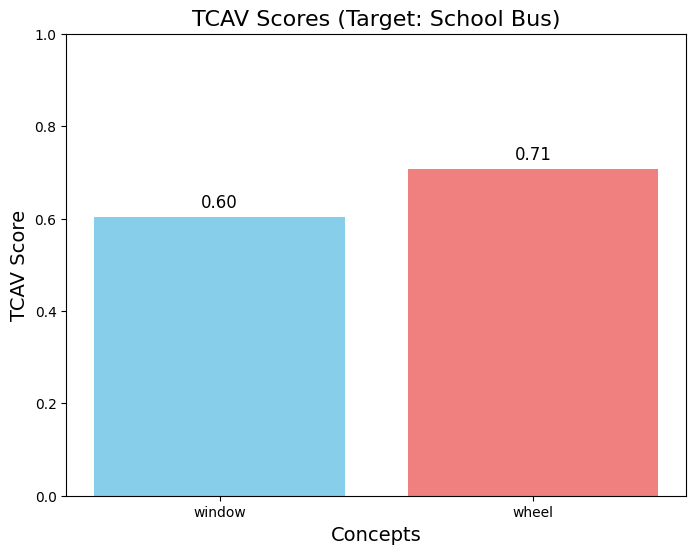

In [23]:
# Plot bar chart of TCAV scores
concepts = ['window', 'wheel']
tcav_scores = [window_tcav_score, wheel_tcav_score]



plt.figure(figsize=(8, 6))
plt.bar(concepts, tcav_scores, color=['skyblue', 'lightcoral'])

# add title and label
plt.title('TCAV Scores (Target: School Bus)', fontsize=16)
plt.xlabel('Concepts', fontsize=14)
plt.ylabel('TCAV Score', fontsize=14)
plt.ylim(0, 1)

for i, score in enumerate(tcav_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=12)

plt.show()

## Summary:

In the ResNet-34 model's learning for the 'school bus' class, the model shows a stronger ability to learn the concept of "wheel" compared to the concept of "window." Specifically, the higher TCAV score for "wheel" (0.71) compared to "window" (0.60) suggests that the model is more aligned with recognizing the "wheel" concept when classifying 'school bus.'

This result kind of supports my alternative hypothesis (H1), indicating that the model learns the "wheel" concept better than the "window" concept. However, the difference is not significant.